## Preprocessing

In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf # commenting out as it only works in GoogleColab
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#  Import and read the charity_data.csv stored within gitHub repo
application_df = pd.read_csv("https://raw.githubusercontent.com/i-am-phoenix/Charity_Funding_Predictor-Deep_Learning_NN/main/resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Dropping the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determining the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Reviewing APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=[]
cutoff = 500

for app in application_df['APPLICATION_TYPE'].unique():
  count = application_df[application_df['APPLICATION_TYPE'] == app]['APPLICATION_TYPE'].count()
  # count = sub_app['APPLICATION_TYPE'].count()
  print(f"{app}\t\t{count}")
  if count < 500:
    application_types_to_replace.append(app)  
application_types_to_replace

T10		528
T3		27037
T5		1173
T7		725
T4		1542
T6		1216
T2		16
T9		156
T19		1065
T8		737
T13		66
T12		27
T29		2
T25		3
T14		3
T17		1
T15		2


['T2', 'T9', 'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15']

In [8]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C1580        1
C4500        1
C1236        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
temp = []

for cls in application_df['CLASSIFICATION'].unique():
  count = application_df[application_df['CLASSIFICATION'] == cls]['CLASSIFICATION'].count()
  if count> 1 :
    temp.append(cls)
temp

['C1000',
 'C2000',
 'C3000',
 'C1200',
 'C2700',
 'C7000',
 'C7200',
 'C1700',
 'C4000',
 'C7100',
 'C2800',
 'C6000',
 'C2100',
 'C1238',
 'C5000',
 'C7120',
 'C1800',
 'C4100',
 'C1400',
 'C1270',
 'C2300',
 'C8200',
 'C1500',
 'C7210',
 'C1300',
 'C1230',
 'C1280',
 'C1240',
 'C2710',
 'C1250',
 'C8000',
 'C1260',
 'C1235',
 'C1720',
 'C1257',
 'C2400',
 'C1600',
 'C1278',
 'C1237',
 'C1267',
 'C1256',
 'C1234',
 'C1246',
 'C0',
 'C3200']

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=[]
cutoff = 1000

for cls in application_df['CLASSIFICATION'].unique():
  count = application_df[application_df['CLASSIFICATION'] == cls]['CLASSIFICATION'].count()
  if count < cutoff:
    classifications_to_replace.append(cls)  
  
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_cat2num = pd.get_dummies(application_df)
application_df_cat2num.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns
X = application_df_cat2num.drop(columns=['IS_SUCCESSFUL'])
y = application_df_cat2num['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5722 - accuracy: 0.7190
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5568 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5536 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5511 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5492 - accuracy: 0.7330
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5494 - accuracy: 0.7311
Epoch 7/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5481 - accuracy: 0.7318
Epoch 8/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5480 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5469 - accuracy: 0.7334
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5457 - accura

804/804 [==============================] - 4s 4ms/step - loss: 0.5351 - accuracy: 0.7397
Epoch 82/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5345 - accuracy: 0.7400
Epoch 83/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5351 - accuracy: 0.7410
Epoch 84/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5347 - accuracy: 0.7399
Epoch 85/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5345 - accuracy: 0.7399
Epoch 86/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5344 - accuracy: 0.7394
Epoch 87/100
804/804 [==============================] - ETA: 0s - loss: 0.5343 - accuracy: 0.73 - 4s 5ms/step - loss: 0.5344 - accuracy: 0.7397
Epoch 88/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5344 - accuracy: 0.7400
Epoch 89/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5344 - accuracy: 0.7400
Epoch 90/100
804/804 [==============================]

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5622 - accuracy: 0.7291
Loss: 0.5621556043624878, Accuracy: 0.7290962338447571


<AxesSubplot:>

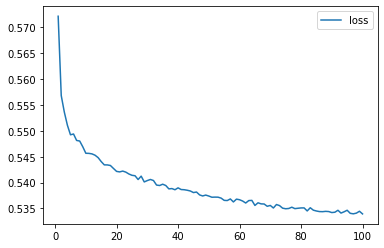

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y = "loss")
plt.grid(alpha=0.3)

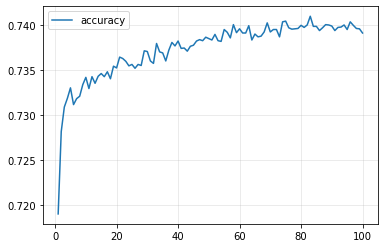

In [27]:
history_df.plot(y = "accuracy")
plt.grid(alpha=0.3)

In [42]:
# Export our model to HDF5 file
nn_model.save("charity_pred_trained.h5")